# 32130 FDA  Assignment 3 Datamining in Action
autumn 2021

## Part 1 Data Preprocessing and Transformation

#### 5. Data scaling

In [1]:
import sklearn as sk
import pandas as pd
import numpy as np

DATAFILE1 = 'D:\\Google One\\8. Library\\0. UTS\\Master of Information Technology\\4. Subjects\\2021 Semester 1\\32130 Fundamentals of Data Analystics\\4. Assignment\\Assignment 3\\Database\\A3TrainingData-clean_dummy.csv'
a3clean = pd.read_csv(DATAFILE1)
a3clean = a3clean[[col for col in a3clean.columns if col != 'Unnamed: 0']]
a3clean.head()

,Quote_Id,Field_info2,Field_info4,Coverage_info1,Coverage_info2,Sales_info1,Sales_info2,Sales_info3,Sales_info5,Personal_info1,...,Property_3_Q,Property_3_R,Property_3_S,Geo_5_CA,Geo_5_IL,Geo_5_NJ,Geo_5_TX,Quote_Year,Quote_Month,Quote_Flag
0,2,0.9153,0,5,2,1,5,11,55101,0,...,0,0,0,1,0,0,0,2014,5,0
1,3,0.9691,0,5,22,1,5,1,5476,0,...,0,0,0,0,0,0,1,2013,6,0
2,6,0.9153,0,6,22,1,5,11,59655,0,...,0,0,0,1,0,0,0,2015,6,0
3,9,0.8793,0,1,22,1,5,11,6943,0,...,0,0,0,0,0,0,1,2014,10,0
4,10,1.0101,0,13,22,1,3,20,61148,0,...,0,1,0,0,0,1,0,2015,3,1


In [2]:
from sklearn.preprocessing import StandardScaler

# Scale only columns that have values greater than 1
to_scale = [col for col in a3clean.columns if a3clean[col].max() > 1]
del to_scale[0]
# to_scale
scaler = StandardScaler()
scaled = scaler.fit_transform(a3clean[to_scale])
scaled = pd.DataFrame(scaled, columns=to_scale)

# Replace original columns with scaled ones
for col in scaled:
    a3clean[col] = scaled[col]
    


In [3]:
data = {
    'attribute':[],
    'distinct':[],
    'data type':[],
    'missing':[]
}
df = pd.DataFrame(data)                                          # overview table is created

for i in a3clean.columns:
    targets = a3clean[i].unique()              # get the distinct value of each attribute
    null = pd.isnull(a3clean[i]).sum()          # count missing values for each attribute
    df = df.append({'attribute':i, 'distinct':len(targets),        # fill the overview table
                    'data type':str(a3clean[i].dtypes), 'missing':null},ignore_index=True)
df.style.format({
    'distinct':'{:.0f}',
    'missing':'{:.0f}'
})

,attribute,distinct,data type,missing
0,Quote_Id,62540,int64,0
1,Field_info2,38,float64,0
2,Field_info4,2,int64,0
3,Coverage_info1,26,float64,0
4,Coverage_info2,4,float64,0
5,Sales_info1,2,int64,0
6,Sales_info2,5,float64,0
7,Sales_info3,23,float64,0
8,Sales_info5,36094,float64,0
9,Personal_info1,2,int64,0


In [4]:
# df.to_csv("D:\\Google One\\8. Library\\0. UTS\\Master of Information Technology\\4. Subjects\\2021 Semester 1\\32130 Fundamentals of Data Analystics\\4. Assignment\\Assignment 3\\Database\\A3TrainingData-clean-column.csv")
# a3clean.head()

In [5]:
# a3clean.to_csv("D:\\Google One\\8. Library\\0. UTS\\Master of Information Technology\\4. Subjects\\2021 Semester 1\\32130 Fundamentals of Data Analystics\\4. Assignment\\Assignment 3\\Database\\A3TrainingData-clean.csv")

### check data balance



Balance of positive and negative classes (%):


0    80.884234
1    19.115766
Name: Quote_Flag, dtype: float64

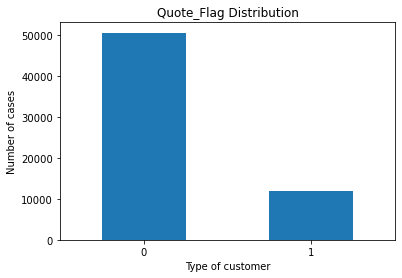

In [11]:
import matplotlib.pyplot as plt

count_class = pd.value_counts(a3clean['Quote_Flag'],sort=True)
count_class.plot(kind = 'bar', rot=0)
plt.title('Quote_Flag Distribution')
# plt.xticks(range(2),LABELS)
plt.xlabel('Type of customer')
plt.ylabel('Number of cases')
print('\nBalance of positive and negative classes (%):')
a3clean['Quote_Flag'].value_counts(normalize=True) * 100
